# Example Plotting code for PMX ddG analysis

Specify paths to the experimental results (expecting column headers like the Merck benchmark sets [J. Chem. Inf. Model. 2020, 60, 11, 5457–5474](https://doi.org/10.1021/acs.jcim.0c00900)), the resltsSummary.csv file from the pmx job, and the path to the perturbation mapper log file


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.offsetbox import AnchoredText
pd.set_option('display.max_rows', None)
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import mean_absolute_dev

In [28]:
EXP_PATH = "<fill_path>/results_5ns.csv"
RESULTS_PATH = "<fill_path>/resultsSummary.csv"
LOG_PATH = "<fill_path>/fep_mapper.log"


In [29]:
exp_data = pd.read_csv(EXP_PATH, dtype=str)
exp_data

,Affinity unit,#,Ligand,Quality,Pred. ΔG,Pred. Error,Exp. ΔG,Structure
0,kcal/mol,1,1a,0,-8.0,0.18,-8.55,[#1][c-0X3]1[c-0X3]([#1])[c-0X3]([c-0X3]([#1])...
1,kcal/mol,2,1b,0,-9.61,0.17,-9.94,[#1][c-0X3]1[c-0X3]([#1])[c-0X3]([c-0X3]([#1])...
2,kcal/mol,3,3a,0,-12.84,0.22,-11.0,[#1][n-0X3]1[c-0X3](=[O-0X1])[c-0X3]2[c-0X3]([...
3,kcal/mol,4,3b,0,-12.45,0.24,-11.52,[#1][c-0X3]1[c-0X3]2[n-0X2][c-0X3]([n-0X3]([#1...
4,kcal/mol,5,5a,0,-11.53,0.17,-10.76,[#1][c-0X3]1[c-0X3]2[n-0X2][c-0X3]([n-0X3]([#1...
5,kcal/mol,6,5b,0,-12.27,0.2,-10.47,[#1][c-0X3]1[c-0X3]2[n-0X2][c-0X3]([n-0X3]([#1...
6,kcal/mol,7,5c,0,-12.03,0.18,-9.96,[#1][c-0X3]1[c-0X3]2[n-0X2][c-0X3]([n-0X3]([#1...
7,kcal/mol,8,5d,0,-10.87,0.18,-10.89,[#1][c-0X3]1[c-0X3]2[n-0X2][c-0X3]([n-0X3]([#1...
8,kcal/mol,9,5e,0,-10.83,0.17,-10.11,[#1][c-0X3]1[c-0X3]2[n-0X2][c-0X3]([n-0X3]([#1...
9,kcal/mol,10,5f,0,-11.63,0.18,-10.26,[#1][c-0X3]1[c-0X3]([#1])[c-0X3]([c-0X3]2[c-0X...


In [30]:
with open(LOG_PATH, 'r') as f:
    data = f.readlines()

start_content = [l for l in data if "Node calculated properties" in l]
start_node = data.index(start_content[0])
stop_content = [l for l in data if "* Simulation Protocol" in l]
stop_node= data.index(stop_content[0])
split_data = []
for line in data:
    line = line.replace("->", "  ")
    split_line = line.split("  ")
    
    stripped_line = []
    for element in split_line:
        if not element.isspace() and element:
            stripped_line.append(element.strip())
    split_data.append(stripped_line)

data = split_data

node_info = pd.DataFrame(
            data[start_node + 3 : stop_node - 1],
            index=None,
            columns=[
                "hash_id",
                "node_id",
                "Predicted dG",
                "Experimental dG",
                "Predicted Solvation dG",
                "Experimental Solvation dG",
            ],
        )

node_info

,hash_id,node_id,Predicted dG,Experimental dG,Predicted Solvation dG,Experimental Solvation dG
0,0d16094,3a,N/A,N/A,N/A,N/A
1,1a849ad,5f,N/A,N/A,N/A,N/A
2,1d02965,8e,N/A,N/A,N/A,N/A
3,272cc87,5l,N/A,N/A,N/A,N/A
4,2a8e26e,8b,N/A,N/A,N/A,N/A
5,2bb0d13,5g,N/A,N/A,N/A,N/A
6,2d91a20,1b,N/A,N/A,N/A,N/A
7,36d4625,5e,N/A,N/A,N/A,N/A
8,5933eb5,5i,N/A,N/A,N/A,N/A
9,684785b,8d,N/A,N/A,N/A,N/A


In [31]:
results_data = pd.read_csv(RESULTS_PATH)
results_data[["lig1", "lig2"]] = results_data["Unnamed: 0"].str.split("_", expand=True,)
results_data.head()
# convert from kj/mol to kcal/mol
results_data["val"] = results_data["val"] / 4.184

In [32]:
def compute_exp_ddG(lig1: str, lig2: str) -> float:
    """
    Compute the ddG between two ligands from experimental data
    """
    lig1_id = node_info.loc[node_info["hash_id"] == lig1]["node_id"].to_list()[0].replace(" ", "")
    lig2_id = node_info.loc[node_info["hash_id"] == lig2]["node_id"].to_list()[0].replace(" ", "")
    lig1_dG = float(exp_data.loc[exp_data["Ligand"] == lig1_id]["Exp. ΔG"].tolist()[0])
    lig2_dG = float(exp_data.loc[exp_data["Ligand"] == lig2_id]["Exp. ΔG"].tolist()[0])
    return (lig2_dG - lig1_dG)

In [33]:
results_data.iloc[0]["lig1"]

'0d16094'

In [34]:
results_data["exp_ddG"] = results_data.apply(lambda x: np.array(compute_exp_ddG(x["lig1"], x["lig2"])), axis=1)

3a 5a
3a 7
3a 5c
5f 5g
5f 5j
8e 8b
8e 8c
8e 8a
5l 1b
5l 5b
5l 5k
5l 5o
8b 8f
8b 8a
5g 5i
5g 7
5g 5p
1b 1a
5e 5k
5e 5p
5e 5c
5i 5o
5i 5d
8d 8c
8d 1a
8d 8f
5b 5h
5b 5j
5b 5d
5b 5c
5h 5m
8c 1a
5a 3b
5a 5n
5k 5n
7 5m
1a 8a
1a 5d
5j 3b
3b 5d


In [35]:
results_data

,Unnamed: 0,lig1,lig2,val,err_analyt,err_boot,exp_ddG
0,0d16094_81ac7ee,0d16094,81ac7ee,0.017527,1.149694,1.141290,0.2400000000000002
1,0d16094_902ba3c,0d16094,902ba3c,-0.001593,1.867179,1.795299,2.5999999999999996
2,0d16094_fc284a2,0d16094,fc284a2,-0.716221,2.471599,2.462594,1.0399999999999991
3,1a849ad_2bb0d13,1a849ad,2bb0d13,-0.475621,0.607358,0.589223,-0.5500000000000007
4,1a849ad_a903013,1a849ad,a903013,-3.290312,1.605733,1.608952,-0.8200000000000003
5,1d02965_2a8e26e,1d02965,2a8e26e,-1.586998,0.606312,0.594099,-1.6899999999999995
6,1d02965_7a2b4c9,1d02965,7a2b4c9,0.019120,0.163797,0.175673,0.120000000000001
7,1d02965_b7fe5cf,1d02965,b7fe5cf,-1.323295,1.249195,1.269037,-0.5700000000000003
8,272cc87_2d91a20,272cc87,2d91a20,-0.170491,2.666133,2.635228,0.15000000000000036
9,272cc87_7327eb8,272cc87,7327eb8,-1.281071,0.706194,0.685533,-0.3800000000000008


In [37]:
stats_out = stats.linregress(results_data["exp_ddG"].dropna().astype(float), results_data["val"].dropna())
tau = stats.kendalltau(results_data["exp_ddG"].dropna().astype(float), results_data["val"].dropna())
mae = mean_absolute_error(results_data["exp_ddG"].dropna().astype(float),results_data["val"].dropna())
rmse = mean_squared_error(results_data["exp_ddG"].dropna().astype(float),results_data["val"].dropna(), squared=False)

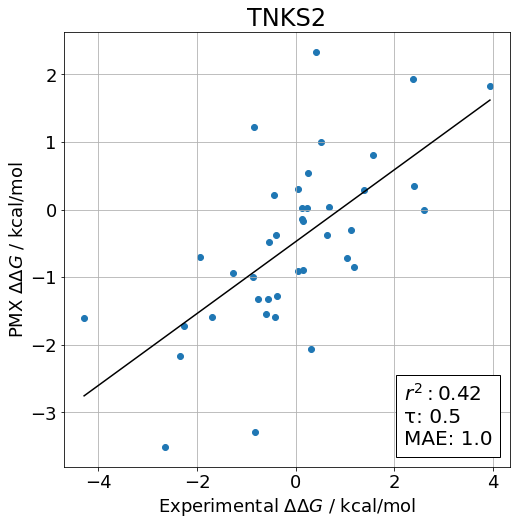

In [39]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(results_data["exp_ddG"], results_data["val"] , marker='o')
x = np.linspace(min(results_data["exp_ddG"]), max(results_data["exp_ddG"]), 100)
ax.plot(x, stats_out[0] * x + stats_out[1], color='black')
plt.title("TNKS2", fontsize=24)
at = AnchoredText("$r^2: $" + f"{np.round(stats_out[2]**2, 2)}\n" + "τ: " + f"{np.round(tau[0], 2)}\n" + "MAE: "+ f"{np.round(mae, 2)}", loc='lower right', prop=dict(size=20))
ax.add_artist(at)
plt.xlabel("Experimental $\Delta \Delta G$ / kcal/mol", fontsize=18)
plt.ylabel("PMX $\Delta \Delta G$ / kcal/mol", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.show()


In [43]:
abs_err = list(abs(results_data["exp_ddG"] -results_data["val"]))
abs_err = np.array(abs_err) 
abs_err

array([0.22247291, 2.60159337, 1.75622052, 0.07437859, 2.4703123 ,
       0.10300191, 0.10087954, 0.75329509, 0.32049076, 0.90107075,
       0.12267049, 1.24971319, 0.25304653, 1.42911409, 0.32592734,
       2.0682218 , 2.37660293, 1.1039898 , 2.07689611, 0.01635437,
       1.05105163, 0.26114723, 2.04245379, 0.43485022, 2.106826  ,
       0.6409624 , 1.91508604, 0.92840025, 1.16699809, 0.4818738 ,
       0.87338432, 0.76694073, 0.57046526, 0.952645  , 0.29652645,
       2.6870682 , 0.53995539, 0.16903123, 0.65829191, 1.01161249])

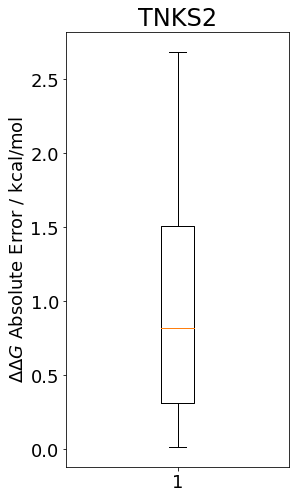

In [44]:
fig, ax = plt.subplots(1,1, figsize=(4, 8))
plt.title("TNKS2", fontsize=24)
plt.ylabel("$\Delta \Delta G$ Absolute Error / kcal/mol", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.boxplot(abs_err)
plt.show()